In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


data = pd.read_csv(r'C:\Users\nadia\OneDrive\Desktop\11_University of Patras.csv')
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%y %H:%M')

data['month'] = data['datetime'].dt.month
data['hour'] = data['datetime'].dt.hour

print(data)

                datetime     PM2.5  month  hour
0    2020-01-01 00:00:00  4.061770      1     0
1    2020-01-01 01:00:00  3.522560      1     1
2    2020-01-01 02:00:00  2.972290      1     2
3    2020-01-01 03:00:00  2.924620      1     3
4    2020-01-01 04:00:00  3.846485      1     4
...                  ...       ...    ...   ...
8779 2020-12-31 19:00:00  5.299247     12    19
8780 2020-12-31 20:00:00  3.286940     12    20
8781 2020-12-31 21:00:00  2.117047     12    21
8782 2020-12-31 22:00:00  3.290510     12    22
8783 2020-12-31 23:00:00  2.203778     12    23

[8784 rows x 4 columns]


# dataframes for each month

In [2]:
January = data[data['PM2.5'].gt(0) & data["month"].eq(1)]
February = data[data['PM2.5'].gt(0) & data["month"].eq(2)]
March = data[data['PM2.5'].gt(0) & data["month"].eq(3)]
April = data[data['PM2.5'].gt(0) & data["month"].eq(4)]
May = data[data['PM2.5'].gt(0) & data["month"].eq(5)]
June = data[data['PM2.5'].gt(0) & data["month"].eq(6)]
July = data[data['PM2.5'].gt(0) & data["month"].eq(7)]
August = data[data['PM2.5'].gt(0) & data["month"].eq(8)]
September = data[data['PM2.5'].gt(0) & data["month"].eq(9)]
November = data[data['PM2.5'].gt(0) & data["month"].eq(10)]
October = data[data['PM2.5'].gt(0) & data["month"].eq(11)]
December = data[data['PM2.5'].gt(0) & data["month"].eq(12)]

In [3]:
warm = data[data["month"].between(4,10)]

In [4]:
cold = data[data['month'].eq(11) | data["month"].eq(12)| data["month"].eq(1)| data["month"].eq(2)| data["month"].eq(3)]

# functions

In [5]:
def pm(x,y,col):
    plt.figure(figsize=(10,10))
    plt.xlabel("DATEtime")
    plt.ylabel("PM concentracion (μg/m3)")

    plt.plot(x,y,color=col)

In [6]:
def statistics(x):
    print("the min value is", min(x))
    print("the max value is", max(x))
    print("the mean value is", np.mean(x))
    print("the standard deviation value is", np.std(x))

In [7]:
def bar(x,y,a,b):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1.5,1.5])
    ax.bar(data[x],data["PM2.5"],linewidth=0)
    plt.xlabel(y)
    plt.ylabel("PM(μg/m3)")
    plt.ylim(0, a)
    title = "PM concentation during the"+" "+ b
    plt.title(title)

# data visualisation and statistical analysis

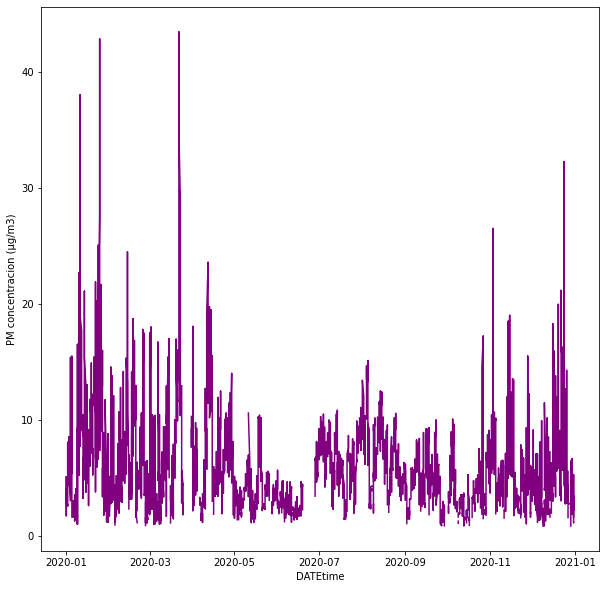

In [8]:
#this one is not needed, just initial visualisation
pm(data["datetime"].dt.date,data["PM2.5"],"purple")

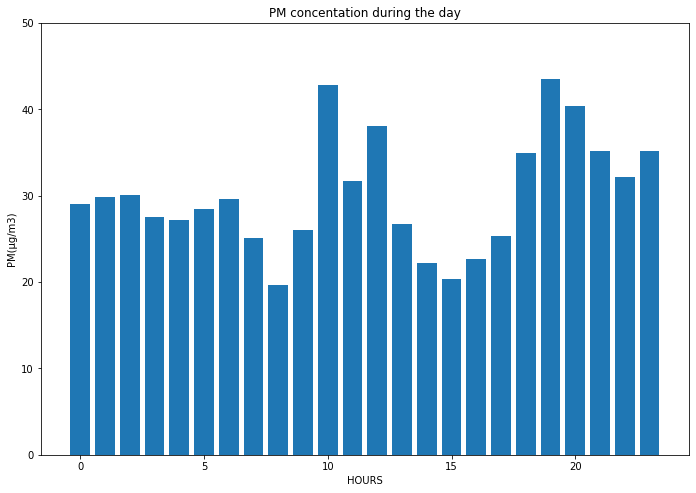

In [9]:
#PM concentration during the day
bar("hour","HOURS",50,"day")

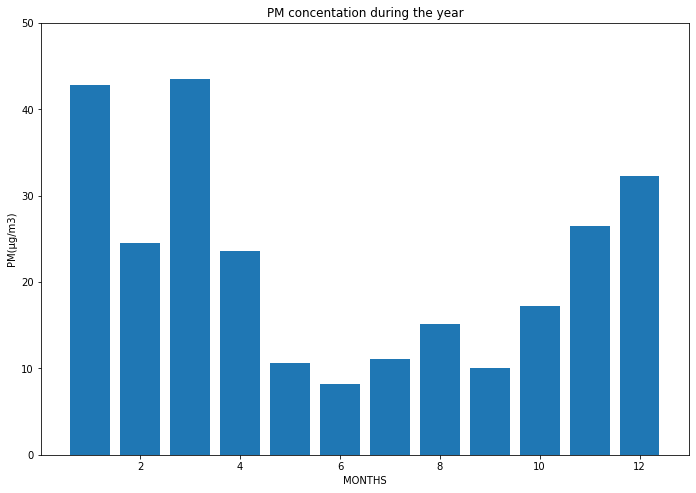

In [10]:
#PM concentration during the year
bar("month","MONTHS",50,"year")

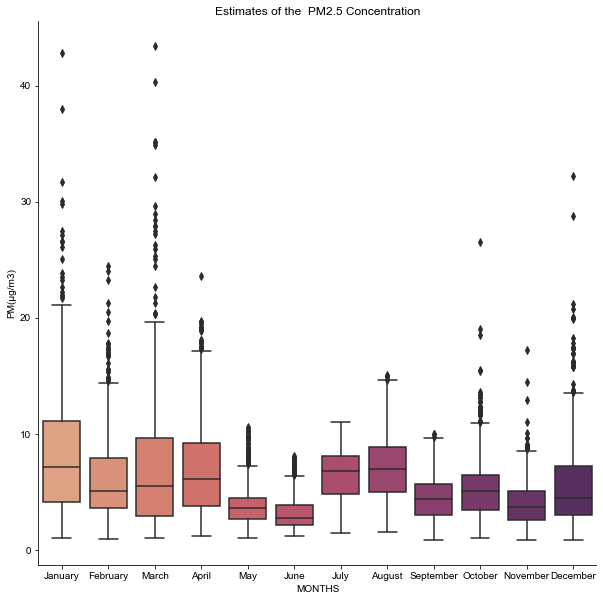

In [11]:
combined_dfs = pd.DataFrame({'January': January['PM2.5'],
                             'February': February['PM2.5'],
                             'March': March['PM2.5'],
                             'April': April['PM2.5'],
                             'May': May['PM2.5'],
                             'June': June['PM2.5'],
                             'July': July['PM2.5'],
                             'August': August['PM2.5'],
                             'September': September['PM2.5'],
                             'October': October['PM2.5'],
                             'November': November['PM2.5'],
                             'December': December['PM2.5'],})
plt.figure(figsize=(10,10))
plt.title("Estimates of the  PM2.5 Concentration")
sns.set_style('white')
plt.xlabel('MONTHS')
plt.ylabel('PM(μg/m3)')
sns.boxplot(data=combined_dfs, palette='flare')
sns.despine()
plt.show()

In [12]:
statistics(data["PM2.5"])

the min value is 0.8557
the max value is 43.45196
the mean value is 5.882247079078079
the standard deviation value is 3.8278516810235


In [13]:
#similarly we can find the statistics for every month
statistics(January["PM2.5"])

the min value is 1.00865
the max value is 42.84562
the mean value is 8.28755854868785
the standard deviation value is 5.467503877376029


Text(0.5, 1.0, 'PM concentation during the cold period')

<Figure size 720x720 with 0 Axes>

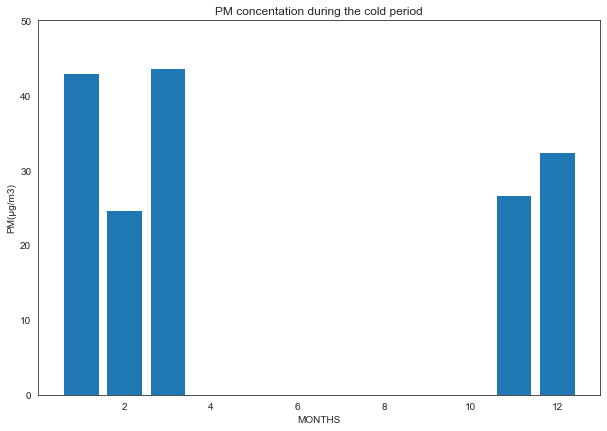

In [14]:
plt.figure(figsize=(10,10))
fig = plt.figure()
ax = fig.add_axes([0,0,1.3,1.3])
ax.bar(cold['month'],cold["PM2.5"],linewidth=0)
plt.xlabel("MONTHS")
plt.ylabel("PM(μg/m3)")
plt.ylim(0, 50)
plt.title("PM concentation during the cold period")

In [15]:
statistics(cold["PM2.5"])

the min value is 0.8571
the max value is 43.45196
the mean value is 6.574604061500005
the standard deviation value is 4.68495859263577


Text(0.5, 1.0, 'PM concentation during the warm period')

<Figure size 720x720 with 0 Axes>

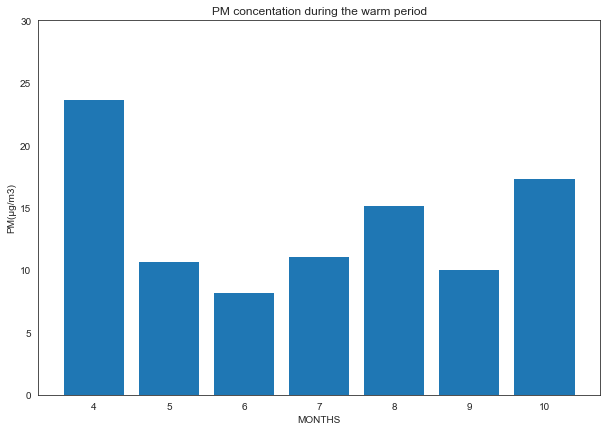

In [16]:
plt.figure(figsize=(10,10))
fig = plt.figure()
ax = fig.add_axes([0,0,1.3,1.3])
ax.bar(warm['month'],warm["PM2.5"],linewidth=0)
plt.xlabel("MONTHS")
plt.ylabel("PM(μg/m3)")
plt.ylim(0, 30)
plt.title("PM concentation during the warm period")

In [17]:
statistics(warm["PM2.5"])

the min value is 0.8557
the max value is 23.61571
the mean value is 5.372323696205364
the standard deviation value is 2.943732578400038


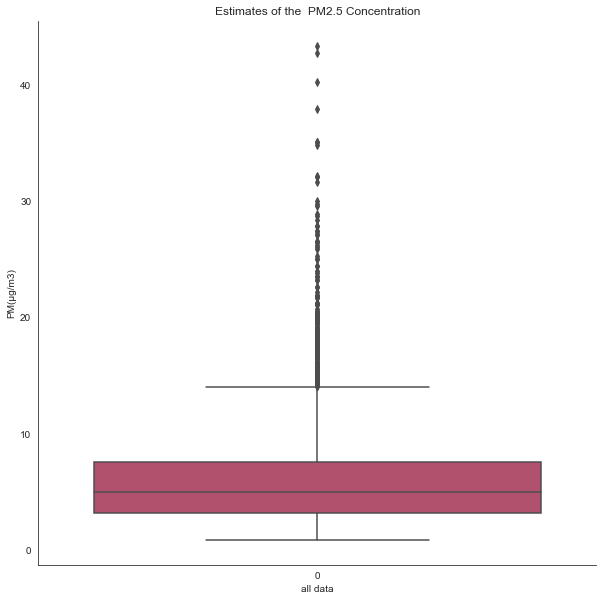

In [18]:
plt.figure(figsize=(10,10))
plt.title("Estimates of the  PM2.5 Concentration")
sns.set_style('white')
plt.xlabel('all data')
plt.ylabel('PM(μg/m3)')
sns.boxplot(data=data["PM2.5"], palette='flare')
sns.despine()
plt.show()

Many, MANY outliers, could be possible the reason why we get such high PM concentrations in our bar charts.

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51